In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import datasets, cluster
from scipy.cluster.hierarchy import fcluster
%matplotlib inline

In [2]:
the_data = datasets.load_iris().data

In [3]:
X  = the_data
print X.shape

(150L, 4L)


## Scaling if required

C:\Users\rshars\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


1.66191833601


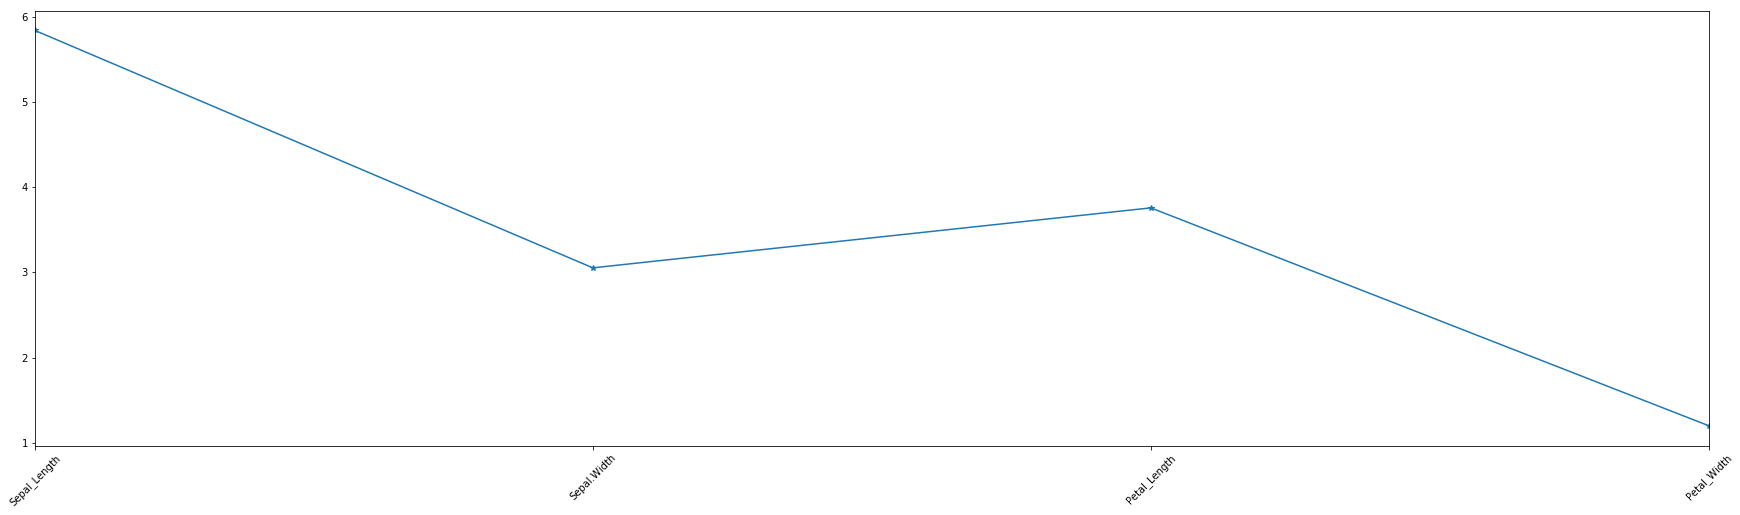

In [4]:
means = pd.DataFrame(the_data, columns=['Sepal_Length','Sepal.Width','Petal_Length','Petal_Width']).mean()

fig_plot = means.plot(y = means.values,style = "*-" ,xticks = range(means.shape[0]),rot = 45,figsize=(30,8)).get_figure()
fig_plot.show()

print(np.std(means))

Not scaling since the variables are in similar scales

## PCA Process to visualise the dataset in 2 dimension

In [5]:
reduced_data = PCA(n_components=2).fit_transform(X)
print(reduced_data.shape)

X = reduced_data

(150L, 2L)


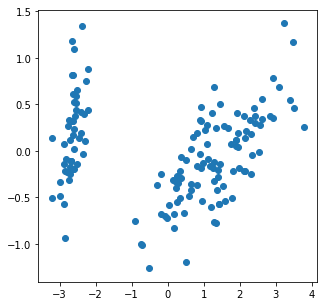

In [6]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1])
plt.show()

## Function for Dendogram

In [7]:
def plot_dendogram(Z, method,cut = False,truncate = False):

    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram-'+method)
    plt.xlabel('sample index')
    plt.ylabel('distance')
    if(truncate == False):
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    elif(truncate == True):
        dendrogram(
            Z,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=10,  # show only the last p merged clusters
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
        )
    if(cut):
        plt.axhline(y=cut, c='k')
    return plt




## Forming the links

In [8]:
Z = linkage(X, method='average', metric='euclidean')

In [9]:
Z.shape

(149L, 4L)

In [10]:
Z

array([[  9.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  3.70000000e+01,   1.50000000e+02,   0.00000000e+00,
          3.00000000e+00],
       [  1.01000000e+02,   1.42000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  1.15000000e+02,   1.48000000e+02,   4.28449773e-03,
          2.00000000e+00],
       [  1.70000000e+01,   2.80000000e+01,   8.50284793e-03,
          2.00000000e+00],
       [  1.60000000e+01,   3.20000000e+01,   2.51817197e-02,
          2.00000000e+00],
       [  5.10000000e+01,   7.50000000e+01,   3.43845015e-02,
          2.00000000e+00],
       [  1.28000000e+02,   1.32000000e+02,   3.66537884e-02,
          2.00000000e+00],
       [  0.00000000e+00,   1.54000000e+02,   4.08193730e-02,
          3.00000000e+00],
       [  1.16000000e+02,   1.37000000e+02,   4.49849576e-02,
          2.00000000e+00],
       [  2.90000000e+01,   3.00000000e+01,   4.49849576e-02,
          2.00000000e+00],
       [  5.70000000e

## Exploring different methods of linking

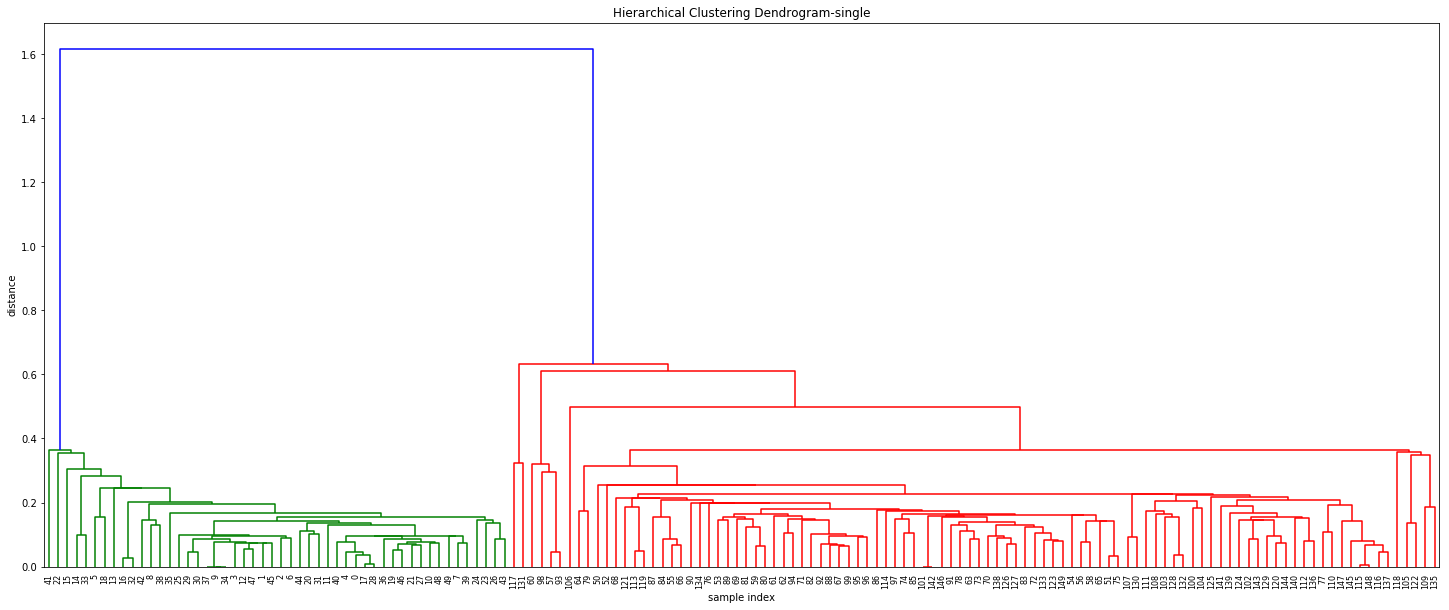

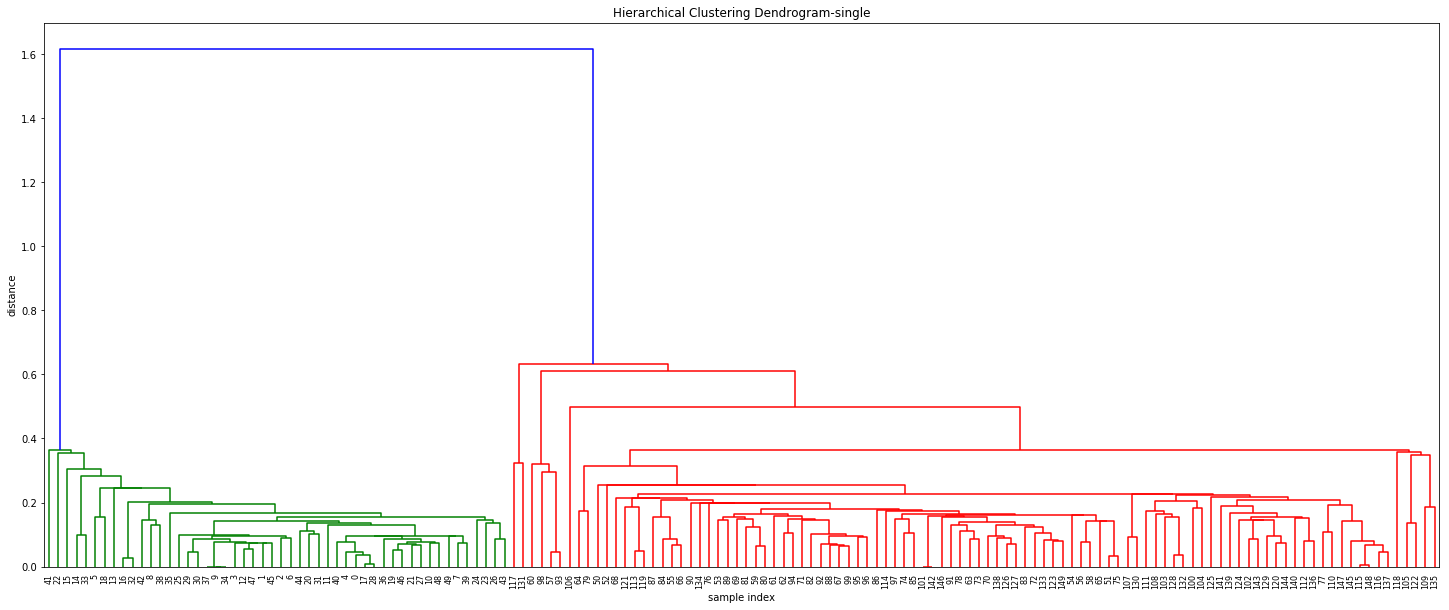

Total number fo cluster:1


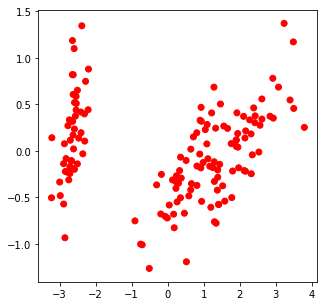

In [11]:
Z = linkage(X, method="single", metric='euclidean')

plot_dendogram(Z,"single").show()

clusters = fcluster(Z,1.7, criterion="distance")

plot_dendogram(Z, "single",cut = 1.7).show()
print("Total number fo cluster:%d" %(max(clusters)))
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

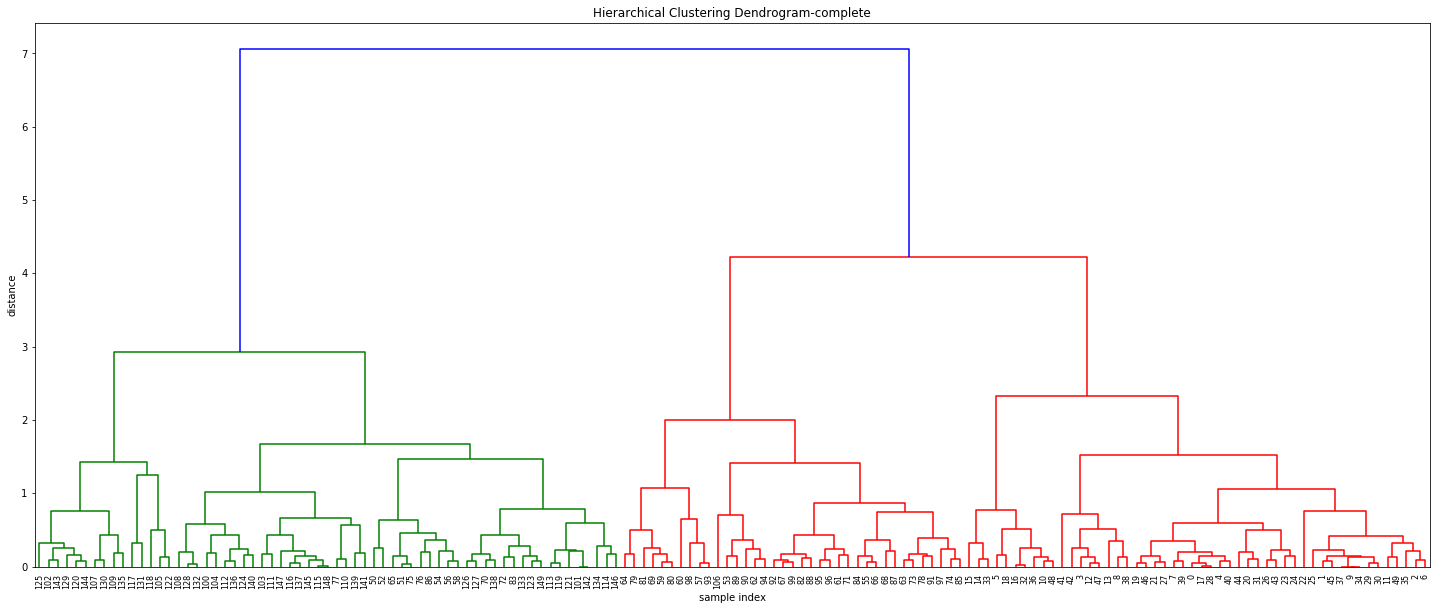

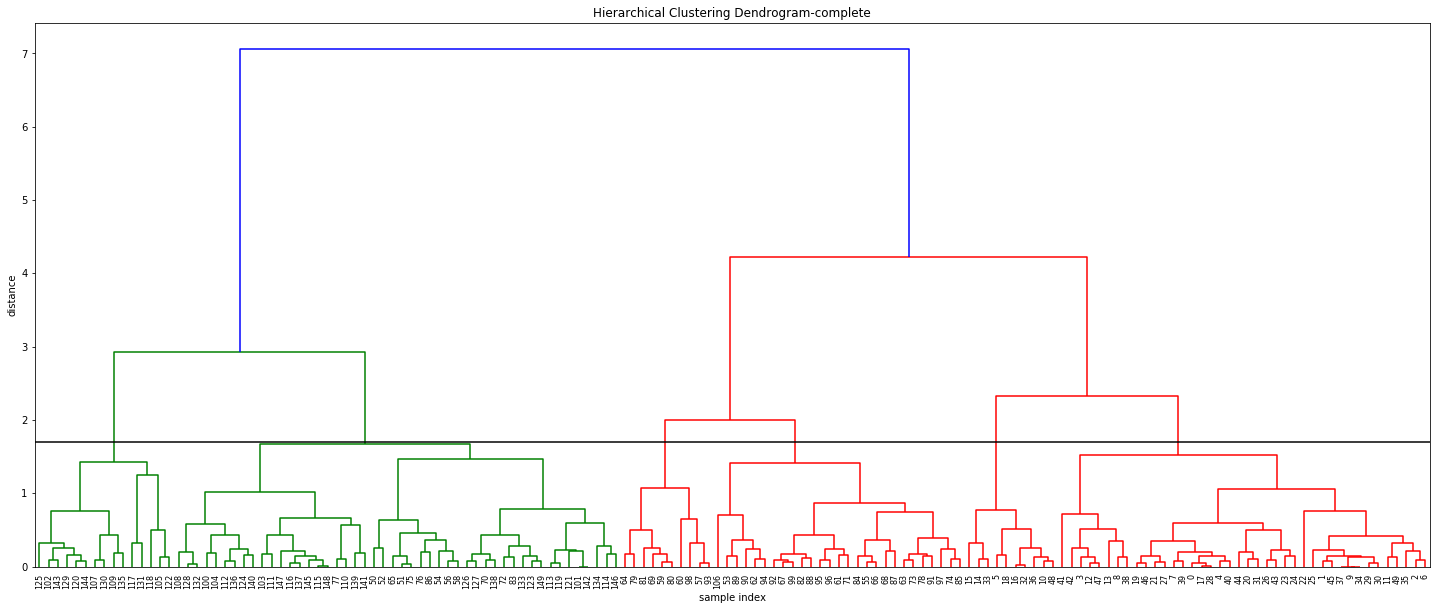

Total number fo cluster:6


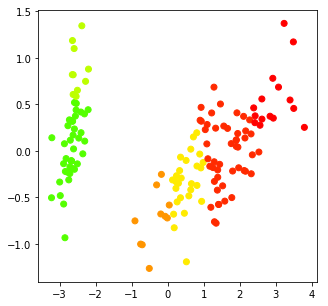

In [12]:
Z = linkage(X, method="complete", metric='euclidean')

plot_dendogram(Z,"complete").show()

clusters = fcluster(Z,1.7, criterion="distance")
plot_dendogram(Z, "complete",cut = 1.7).show()
print("Total number fo cluster:%d" %(max(clusters)))
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [ ]:
Z = linkage(X, method="centroid", metric='euclidean')

plot_dendogram(Z,"centroid").show()
clusters = fcluster(Z,1.7, criterion="distance")
plot_dendogram(Z, "centroid",cut = 1.7).show()
print("Total number fo cluster:%d" %(max(clusters)))
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [ ]:
Z = linkage(X, method="average", metric='euclidean')

plot_dendogram(Z,"average").show()


clusters = fcluster(Z,1.7, criterion="distance")
print("Total number fo cluster:%d" %(max(clusters)))

plot_dendogram(Z, "average",cut = 1.7).show()
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [ ]:
Z = linkage(X, method="ward", metric='euclidean')

plot_dendogram(Z,"ward").show()

clusters = fcluster(Z,1.7, criterion="distance")
plot_dendogram(Z, "ward",cut = 1.7).show()
print("Total number fo cluster:%d" %(max(clusters)))
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## Findind the best methods/ distance metric

Cophenet distance:- 

Suppose <i>p</i> and <i>q</i> are original observations in disjoint clusters <b>s</b> and <b>t</b>, respectively and <b>s</b>  and <b>t</b>  are joined by a direct parent cluster <b>u</b> . The cophenetic distance between observations <i>p</i> and <i>q</i> is simply the distance between clusters <b>s</b> and <b>t</b>.

In [ ]:
def find_good_linkage_method(X, distance_metric = 'euclidean'):
    
    methods = ["single", "complete", "average", "ward", "centroid", "weighted", "median"]
    cophenetic_corrs = []
    for the_method in methods:
        Z = linkage(X, method=the_method, metric='euclidean')
        c, coph_dists = cophenet(Z, pdist(X))
        cophenetic_corrs.append(c)

    cophenetic_analysis = zip(methods, cophenetic_corrs)

    return sorted(cophenetic_analysis, key=lambda x:x[1],reverse = True)[0]

In [ ]:
method, distance = find_good_linkage_method(X)

In [ ]:
print("method:%s \t cophenetic distance:%f" %(method, distance))

In [ ]:
Z = linkage(X, method=method, metric='euclidean')

plot_dendogram(Z,method).show()

clusters = fcluster(Z,1.7, criterion="distance")
plot_dendogram(Z, method,cut = 1.7).show()
print("Total number fo cluster:%d" %(max(clusters)))
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

# Agglomerative clustering with n_cluster known

In [ ]:
clusters = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(X)
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## New functions and concepts